# Initialize

In [40]:
%cd "/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/git/github/GenerativeModelsMetrics"

/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/git/github/GenerativeModelsMetrics


/leonardo/home/userexternal/rtorre00/fast/rtorre00/envs/tf2_custom/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [41]:
visible_devices = [1]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std # type: ignore
from GMetrics.plotters import cornerplotter, plot_corr_matrix # type: ignore

sys.path.insert(0,'utils_func/')
import MixtureDistributions # type: ignore
from optimizers_deformations import compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "results/100D_mixture/"
if os.path.exists(results_dir):
    print("Model directory exists")
else:
    os.makedirs(results_dir)
    print("Model directory was created")
    
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-05-04 14:15:15.739789: Importing os...
2024-05-04 14:15:15.739955: Importing sys...
Visible devices: [1]
2024-05-04 14:15:15.740196: Importing timer from timeit...
2024-05-04 14:15:15.740265: Setting env variables for tf import (only device(s) [1] will be available)...
2024-05-04 14:15:15.740403: Importing numpy...
2024-05-04 14:15:15.740462: Importing matplotlib...
2024-05-04 14:15:15.740521: Importing h5py...
2024-05-04 14:15:15.740574: Importing importlib.util...
2024-05-04 14:15:15.740628: Importing json...
2024-05-04 14:15:15.740681: Importing pandas...
2024-05-04 14:15:15.740732: Importing random...
2024-05-04 14:15:15.740784: Importing scipy utils...
2024-05-04 14:15:15.740890: Importing subprocess...
2024-05-04 14:15:15.740944: Importing tensorflow...
Tensorflow version: 2.16.1
2024-05-04 14:15:15.741024: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2024-05-04 14:15:15.741120: Importing timeit...
2024-05-04 14:15:15.741176: Importing tqdm...
2

# Model definition

In [42]:
seed = 0
ncomp = 10
ndims = 100
niter = 10_000
dist_1 = MixtureDistributions.MixMultiNormal(ncomp = ncomp,
                                             ndims = ndims,
                                             loc_factor = 5.,
                                             scale_factor = 1.,
                                             dtype = tf.float64,
                                             seed = seed)
dist_2 = MixtureDistributions.MixMultiNormal(ncomp = ncomp,
                                             ndims = ndims,
                                             loc_factor = 5.,
                                             scale_factor = 1.,
                                             dtype = tf.float64,
                                             seed = seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (100,) (100,)


# Fixed $n=50000$

## Null hypotheses

### Model definition

In [43]:
batch_size_test = 50_000

In [44]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [45]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 500000000
batch_size 50000
niter 10000
niter * batch_size 500000000
small_sample False


In [46]:
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100, # to be included in metric kwargs
                           seed_slicing = 0, # to be included in metric kwargs
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
FGDMetric = GMetrics.FGDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               num_batches = 20, # to be included in metric kwargs
                               num_points = 10, # to be included in metric kwargs
                               normalise = False) # to be included in metric kwargs
MMDMetric = GMetrics.MMDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4, # to be included in metric kwargs
                               block_size = 20_000, # to be included in metric kwargs
                               normalise = False) # to be included in metric kwargs
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [47]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,...,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample,ncomp
0,10000,50000,10000,10000000,float64,0,True,False,None,True,...,100,0,True,100,0,float64,100,500000000,False,10


In [48]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fgd": {"name": "fgd",
                                       "object_name": "FGDMetric",
                                       "class_name": "GMetrics.FGDMetric",
                                       "kwargs": {"num_batches": 20,
                                                  "num_points": 10,
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50, # optimized for 5D
                                       "latex": "$d_{\mathrm{FGD}}$",
                                       "null_file": null_hypotheses_dir+"FGD.json"},
                               "mmd": {"name": "mmd",
                                       "object_name": "MMDMetric" ,
                                       "class_name": "GMetrics.MMDMetric",
                                       "kwargs": {"degree": 4, 
                                                  "block_size": 20_000, 
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2, # optimized for 5D
                                       "latex": "$d_{\mathrm{MMD}}$",
                                       "null_file": null_hypotheses_dir+"MMD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 5000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fgd': {'name': 'fgd',
  'object_name': 'FGDMetric',
  'class_name': 'GMetrics.FGDMetric',
  'kwargs': {'num_batches': 20, 'num_points': 10, 'normalise': False},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: 1',
  'test_config': {'niter': 10000,
   'batch_size_test': 50000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 100,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 100,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 100,
   'nsamples': 500000000,
   'small_sample': False,
   'ncomp': 10},
  'max_vectorize': 50,
  'latex': '$d_{\\mathrm{FGD}}$',
  'null_file': 'results/100D_mixture/100D_50K/null_hypothesis/FGD.json'},
 'mmd': {'name': 'mmd',
  'object_name': 'MMDMetric',
  'class_name': 'GMetrics

### Evaluate null hypotheses

In [49]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fgd from results/100D_mixture/100D_50K/null_hypothesis/FGD.json


Loading mmd from results/100D_mixture/100D_50K/null_hypothesis/MMD.json
Loading ks from results/100D_mixture/100D_50K/null_hypothesis/KS.json
Loading sks from results/100D_mixture/100D_50K/null_hypothesis/SKS.json
Loading swd from results/100D_mixture/100D_50K/null_hypothesis/SWD.json


In [50]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fgd: [[0.68, [6800, 3199], 0.0151057533709028], [0.95, [9500, 500], 0.08556543843889047], [0.99, [9900, 100], 0.13878260712596915]]
Computing time for metric fgd: 16743.189680044074
ThresholdS for metric mmd: [[0.68, [6800, 3199], 0.046901696856437525], [0.95, [9500, 500], 0.32944378937123986], [0.99, [9900, 100], 0.5526584427239527]]
Computing time for metric mmd: 14586.73138584313
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9129502184590641], [0.95, [9500, 500], 1.0907652480771197], [0.99, [9900, 100], 1.2081802702978335]]
Computing time for metric ks: 876.9256453861017
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9106410004416741], [0.95, [9500, 500], 1.0784950932341122], [0.99, [9900, 100], 1.1849058473005298]]
Computing time for metric sks: 980.9510076669976
ThresholdS for metric swd: [[0.68, [6800, 3199], 0.3489450690289662], [0.95, [9500, 500], 0.44274076525906536], [0.99, [9900, 100], 0.5031477888286332]]
Computing time for metric swd: 380.6659

,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fgd,FGDMetric,GMetrics.FGDMetric,"{'num_batches': 20, 'num_points': 10, 'normali...",metric_list,<function <lambda> at 0x7fbcdfabba60>,"lambda ns, ndims: 1","{'niter': 10000, 'batch_size_test': 50000, 'ba...",50,$d_{\mathrm{FGD}}$,results/100D_mixture/100D_50K/null_hypothesis/...,"[[0.68, [6800, 3199], 0.0151057533709028], [0...."
1,mmd,MMDMetric,GMetrics.MMDMetric,"{'degree': 4, 'block_size': 20000, 'normalise'...",metric_list,<function <lambda> at 0x7fbb05fca660>,"lambda ns, ndims: 1","{'niter': 10000, 'batch_size_test': 50000, 'ba...",2,$d_{\mathrm{MMD}}$,results/100D_mixture/100D_50K/null_hypothesis/...,"[[0.68, [6800, 3199], 0.046901696856437525], [..."
2,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7faa5bfcf2e0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 50000, 'ba...",5000,$\overline{D}$,results/100D_mixture/100D_50K/null_hypothesis/...,"[[0.68, [6800, 3199], 0.9129502184590641], [0...."
3,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7faa5bfcf600>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 50000, 'ba...",50,$\widetilde{D}$,results/100D_mixture/100D_50K/null_hypothesis/...,"[[0.68, [6800, 3199], 0.9106410004416741], [0...."
4,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7faa5bfcf4c0>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 50000, 'ba...",50,$\widetilde{W}$,results/100D_mixture/100D_50K/null_hypothesis/...,"[[0.68, [6800, 3199], 0.3489450690289662], [0...."
5,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7faa5bfcf380>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 50000, 'ba...",20,$t_{\mu}$,results/100D_mixture/100D_50K/null_hypothesis/...,[]


### Plots of null-distributions

mu = 0.018145909136071968 +/- 9.994022485096771e-06
sigma = 0.031613323907961295 +/- 0.0004897466591126424
68%CL = 0.0151057533709028, 95%CL = 0.08556543843889047, 99%CL = 0.13878260712596915
mu = 0.018145909136071968 +/- 9.994022485096771e-06
sigma = 0.031613323907961295 +/- 0.0004897466591126424


/tmp/ipykernel_1057451/1313070078.py:86: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1057451/1313070078.py:88: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1057451/1313070078.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


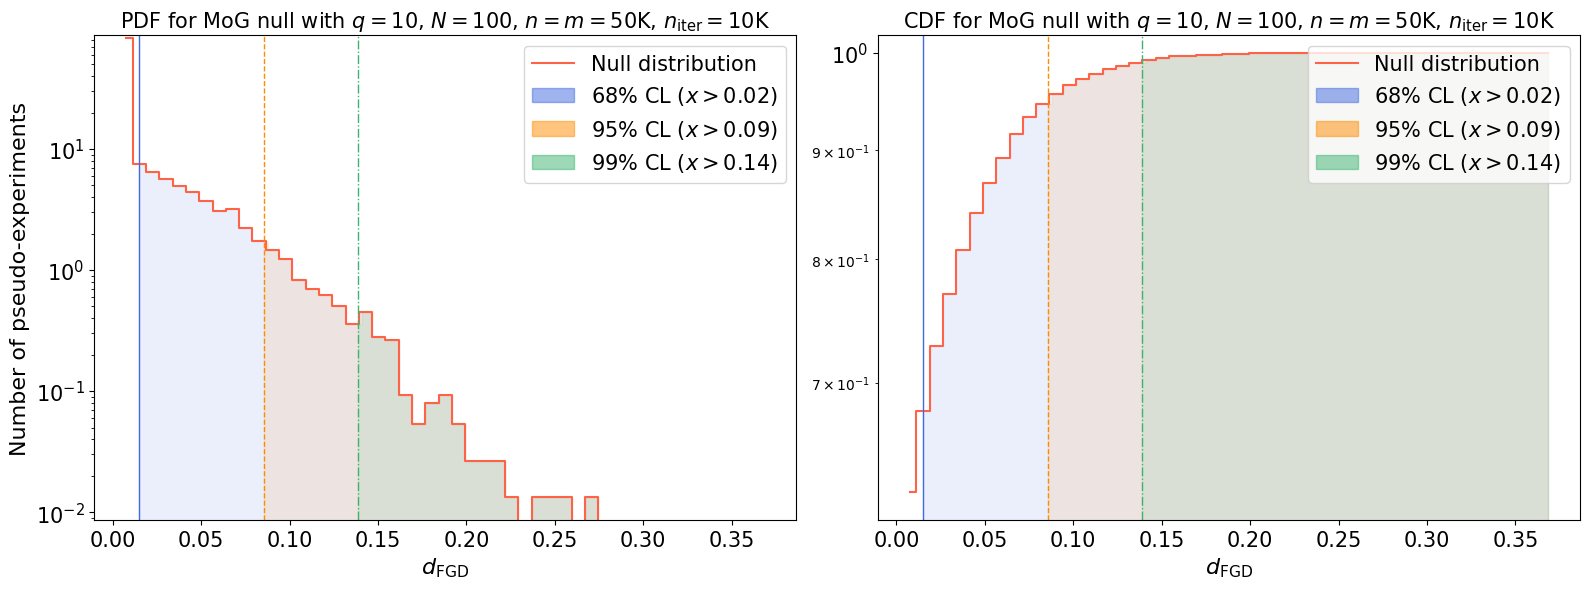

Time elapsed: 0.9721989999525249 seconds.
mu = -0.0015770667262726078 +/- 0.0003029045189259224
sigma = 0.17404152347239504 +/- 0.0017925430565718379
68%CL = 0.046901696856437525, 95%CL = 0.32944378937123986, 99%CL = 0.5526584427239527
mu = -0.0015770667262726078 +/- 0.0003029045189259224
sigma = 0.17404152347239504 +/- 0.0017925430565718379


/tmp/ipykernel_1057451/1313070078.py:86: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1057451/1313070078.py:88: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1057451/1313070078.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1057451/1313070078.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


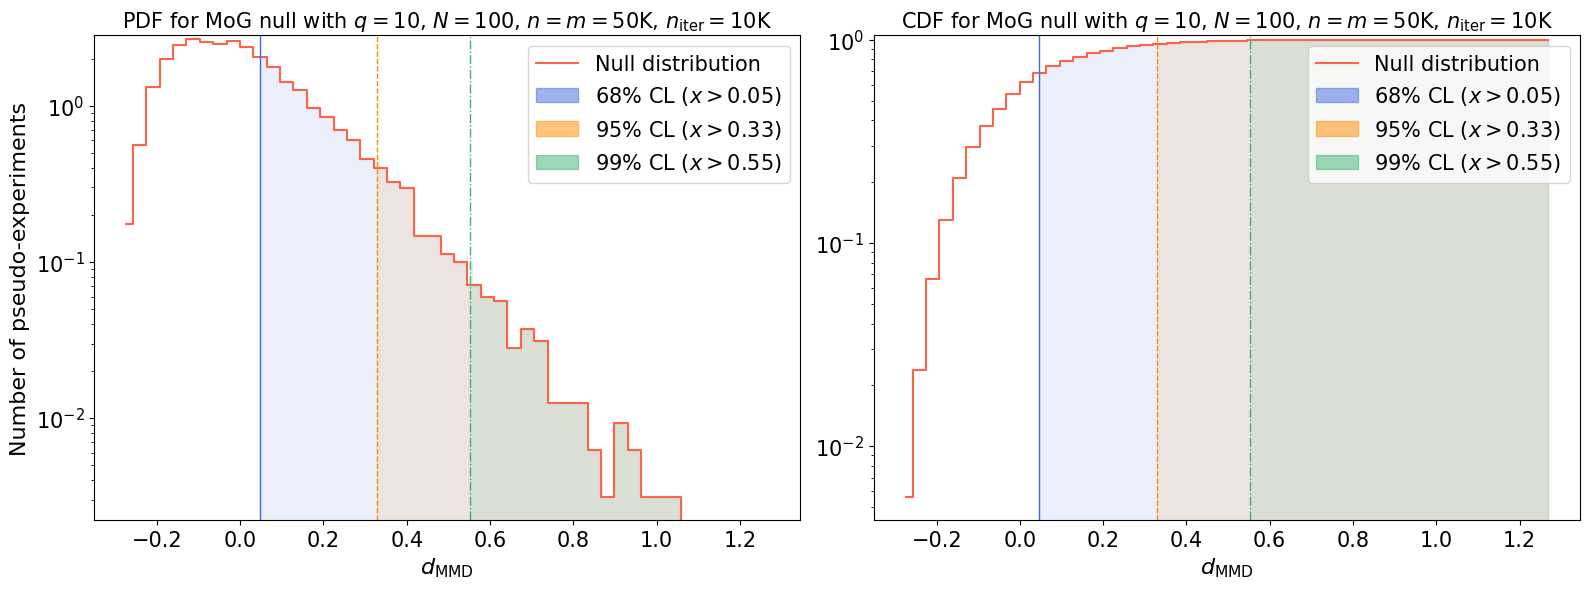

Time elapsed: 0.9186048859264702 seconds.
mu = 0.8662365867597424 +/- 0.0001480059876266251
sigma = 0.1216577114804586 +/- 0.0009728503736558672
68%CL = 0.9129502184590641, 95%CL = 1.0907652480771197, 99%CL = 1.2081802702978335
mu = 0.8662365867597424 +/- 0.0001480059876266251
sigma = 0.1216577114804586 +/- 0.0009728503736558672


/tmp/ipykernel_1057451/1313070078.py:86: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1057451/1313070078.py:88: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1057451/1313070078.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1057451/1313070078.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


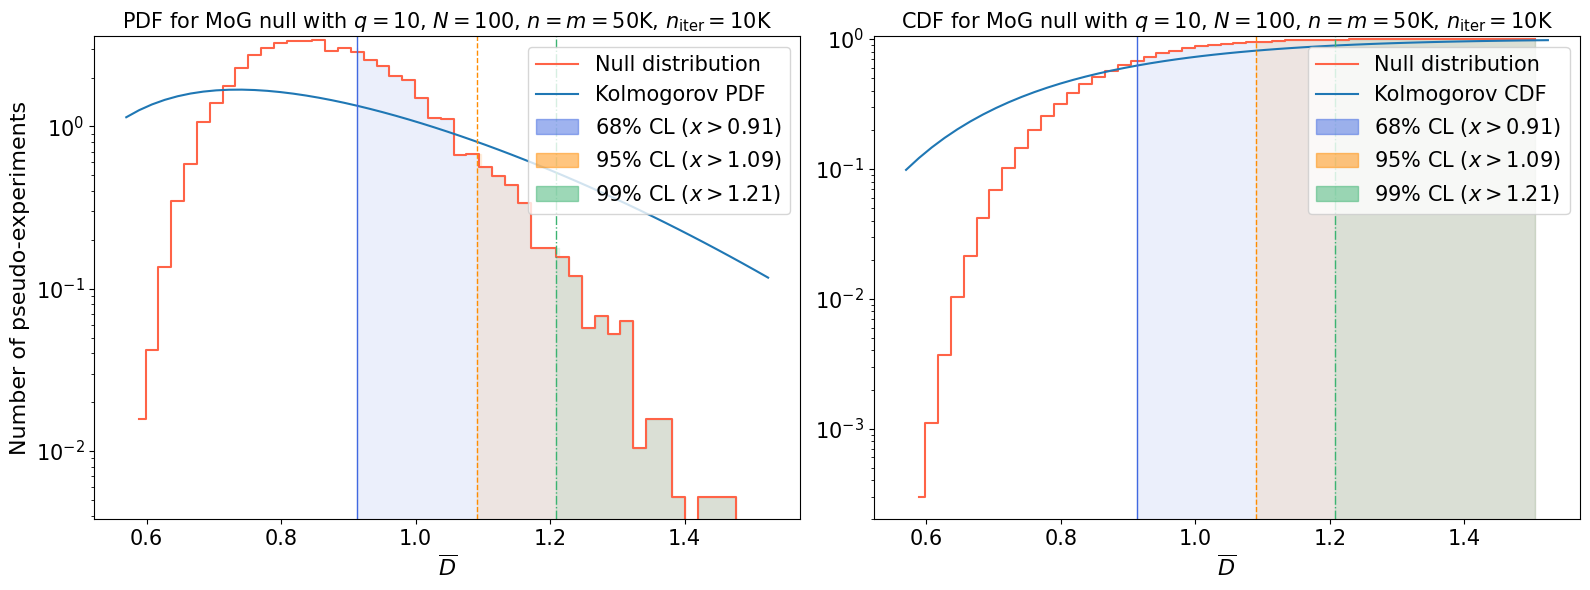

Time elapsed: 1.296312487917021 seconds.
mu = 0.8666788590304592 +/- 0.0001327280454233097
sigma = 0.1152076583493084 +/- 0.0009073435752372434
68%CL = 0.9106410004416741, 95%CL = 1.0784950932341122, 99%CL = 1.1849058473005298
mu = 0.8666788590304592 +/- 0.0001327280454233097
sigma = 0.1152076583493084 +/- 0.0009073435752372434


/tmp/ipykernel_1057451/1313070078.py:86: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1057451/1313070078.py:88: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1057451/1313070078.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1057451/1313070078.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


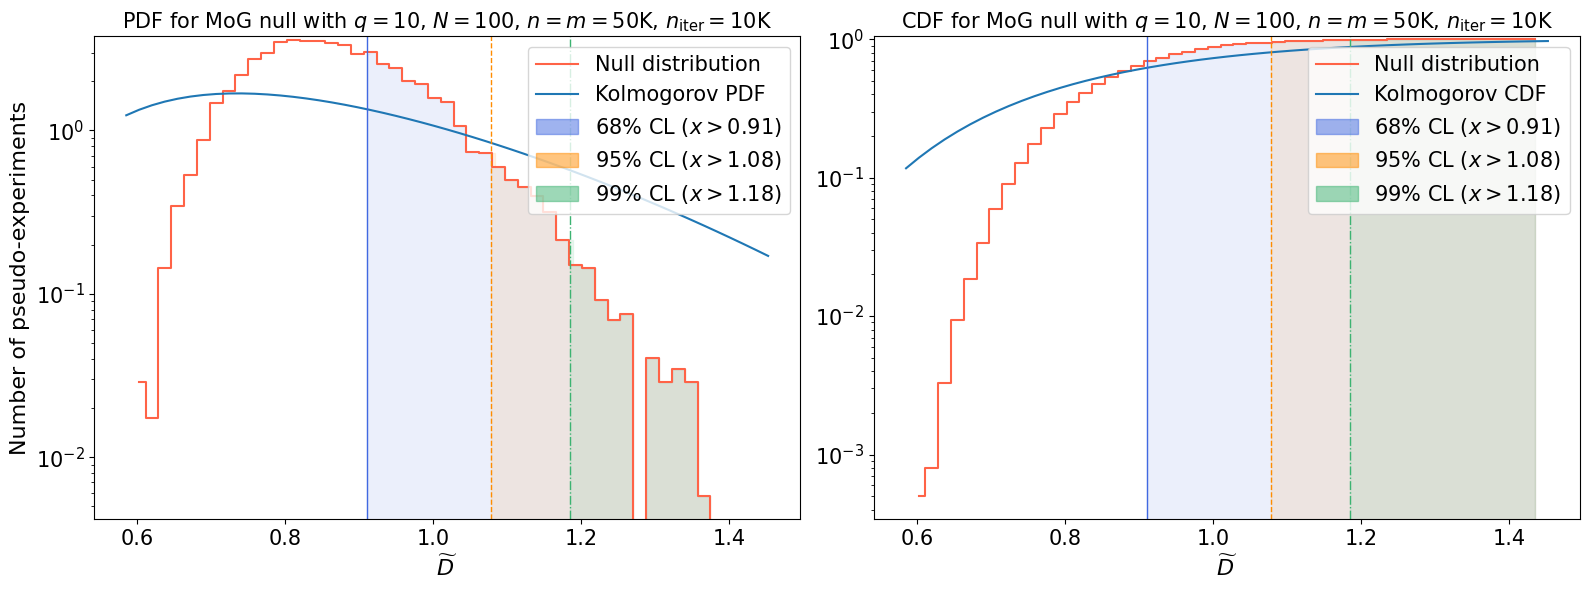

Time elapsed: 1.2853431331459433 seconds.
mu = 0.3230092286661759 +/- 4.3762063505444405e-05
sigma = 0.06615290130103471 +/- 0.0005071021044157315
68%CL = 0.3489450690289662, 95%CL = 0.44274076525906536, 99%CL = 0.5031477888286332
mu = 0.3230092286661759 +/- 4.3762063505444405e-05
sigma = 0.06615290130103471 +/- 0.0005071021044157315


/tmp/ipykernel_1057451/1313070078.py:86: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1057451/1313070078.py:88: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1057451/1313070078.py:123: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1057451/1313070078.py:129: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


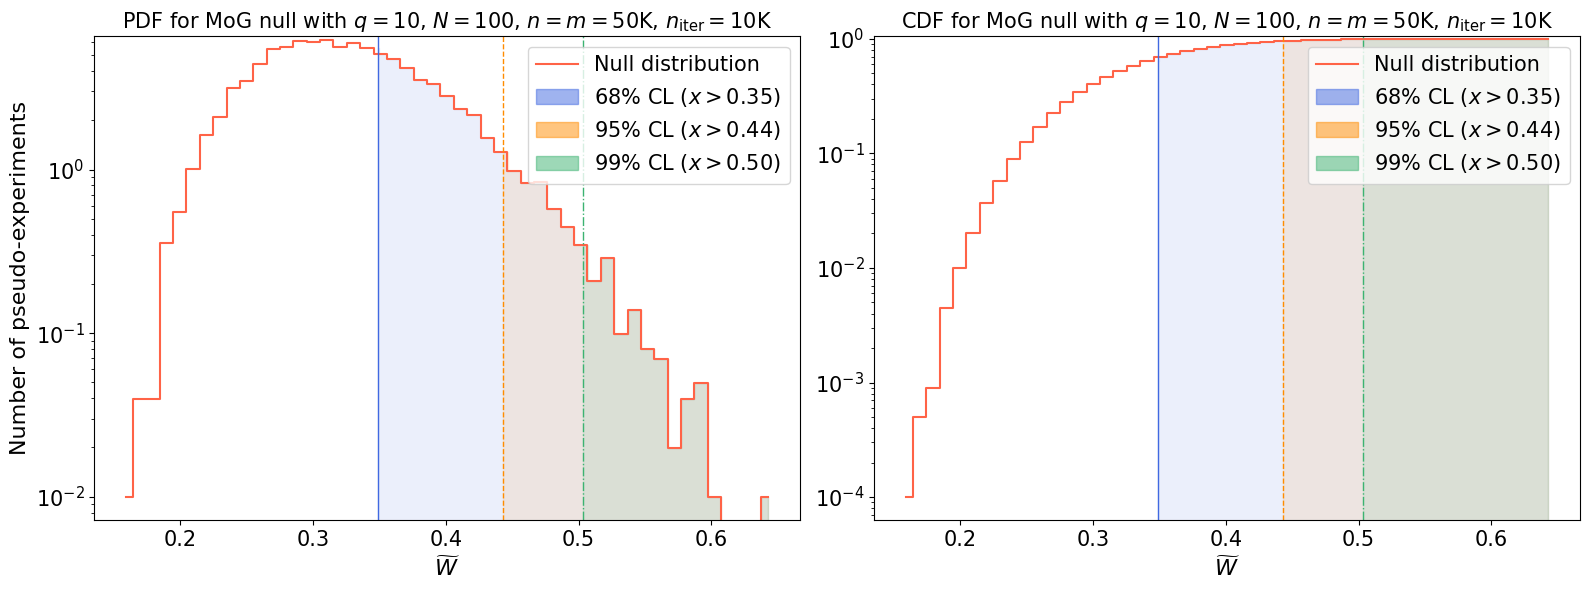

Time elapsed: 0.9885571338236332 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fgd,FGDMetric,GMetrics.FGDMetric,"{'num_batches': 20, 'num_points': 10, 'normali...",metric_list,<function <lambda> at 0x7fbcdfabba60>,"lambda ns, ndims: 1","{'niter': 10000, 'batch_size_test': 50000, 'ba...",50,$d_{\mathrm{FGD}}$,results/100D_mixture/100D_50K/null_hypothesis/...,"[[0.68, [6800, 3199], 0.0151057533709028], [0....",results/100D_mixture/100D_50K/null_hypothesis/...
1,mmd,MMDMetric,GMetrics.MMDMetric,"{'degree': 4, 'block_size': 20000, 'normalise'...",metric_list,<function <lambda> at 0x7fbb05fca660>,"lambda ns, ndims: 1","{'niter': 10000, 'batch_size_test': 50000, 'ba...",2,$d_{\mathrm{MMD}}$,results/100D_mixture/100D_50K/null_hypothesis/...,"[[0.68, [6800, 3199], 0.046901696856437525], [...",results/100D_mixture/100D_50K/null_hypothesis/...
2,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7faa5bfcf2e0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 50000, 'ba...",5000,$\overline{D}$,results/100D_mixture/100D_50K/null_hypothesis/...,"[[0.68, [6800, 3199], 0.9129502184590641], [0....",results/100D_mixture/100D_50K/null_hypothesis/...
3,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7faa5bfcf600>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 50000, 'ba...",50,$\widetilde{D}$,results/100D_mixture/100D_50K/null_hypothesis/...,"[[0.68, [6800, 3199], 0.9106410004416741], [0....",results/100D_mixture/100D_50K/null_hypothesis/...
4,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7faa5bfcf4c0>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 50000, 'ba...",50,$\widetilde{W}$,results/100D_mixture/100D_50K/null_hypothesis/...,"[[0.68, [6800, 3199], 0.3489450690289662], [0....",results/100D_mixture/100D_50K/null_hypothesis/...
5,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7faa5bfcf380>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 50000, 'ba...",20,$t_{\mu}$,results/100D_mixture/100D_50K/null_hypothesis/...,[],NaN


In [51]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)
    #if "FGD" in latex:
    #    latex = r"$d_{\mathrm{FGD}}\,(\times 10)$"
    #    dist_null = dist_null * 10
    #elif "MMD" in latex:
    #    latex = r"$d_{\mathrm{MMD}}\,(\times 10^{-2})$"
    #    dist_null = dist_null / 100
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        #if "FGD" in latex:
        #    threshold_value = threshold_value * 10
        #elif "MMD" in latex:
        #    threshold_value = threshold_value / 100
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        #if "FGD" in latex:
        #    threshold_value = threshold_value * 10
        #elif "MMD" in latex:
        #    threshold_value = threshold_value / 100
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [52]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [53]:
for metric_config in list(metrics_config[unique_key].values())[:-1]:
    print(metric_config["kwargs"])

{'num_batches': 20, 'num_points': 10, 'normalise': False}
{'degree': 4, 'block_size': 20000, 'normalise': False}
{}
{'nslices': 100, 'seed_slicing': 0}
{'nslices': 100, 'seed_slicing': 0}


In [54]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [55]:
deformations = ["mean", "cov_diag", "cov_off_diag", "power_abs_up", "power_abs_down", "random_normal", "random_uniform"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(dist_1,
                                                 metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.02,
                                                 fn_tol = 0.02,
                                                 eps_min = 0.,
                                                 eps_max = 5.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Exclusion limits for fgd with mean deformation already loaded.
Exclusion limits for fgd with cov_diag deformation already loaded.
Exclusion limits for fgd with cov_off_diag deformation already loaded.
Exclusion limits for fgd with power_abs_up deformation already loaded.
Exclusion limits for fgd with power_abs_down deformation already loaded.
Exclusion limits for fgd with random_normal deformation already loaded.
Exclusion limits for fgd with random_uniform deformation already loaded.
Exclusion limits for mmd with mean deformation already loaded.
Exclusion limits for mmd with cov_diag deformation already loaded.
Exclusion limits for mmd with cov_off_diag deformation already loaded.
Exclusion limits for mmd with power_abs_up deformation already loaded.
Exclusion limits for mmd with power_abs_down deformation already loaded.
Exclusion limits for mmd with random_normal deformation already loaded.
Computing exclusion limits for mmd with random_uniform deformation.

=============== mmd - ra

I0000 00:00:1714824936.928874 1057829 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

W0000 00:00:1714824937.199697 1057811 random_ops.cc:59] Warning: Using tf.random.uniform with XLA compilation will ignore seeds; consider using tf.random.stateless_uniform instead if reproducible behavior is desired. while/random_shiftMixture_CONSTRUCTED_AT_top_level/sample/random_shift/forward/random_uniform/RandomUniform
I0000 00:00:1714824943.571860 1057811 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



statistic = 3.726438637673705 - next threshold = 0.32944378937123986 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.6750953260632186

------------ 2 - 0.95 CL ------------
eps = 1.25 - deformation = random_uniform


I0000 00:00:1714824969.528783 1057827 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714824976.223955 1057802 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.2173575177628763 - next threshold = 0.32944378937123986 at 0.95 CL
relative_error_eps = 0.6666666666666666
relative_error_metric = 0.40997075224939694

------------ 3 - 0.95 CL ------------
eps = 1.875 - deformation = random_uniform


I0000 00:00:1714825002.300325 1057806 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714825009.244234 1057806 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



statistic = 1.1644747945329867 - next threshold = 0.32944378937123986 at 0.95 CL
relative_error_eps = 0.4
relative_error_metric = 1.1179069785442601

------------ 4 - 0.95 CL ------------
eps = 1.5625 - deformation = random_uniform


I0000 00:00:1714825035.466349 1057818 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714825042.073154 1057812 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.5619632665176397 - next threshold = 0.32944378937123986 at 0.95 CL
relative_error_eps = 0.2222222222222222
relative_error_metric = 0.5216909056537357

------------ 5 - 0.95 CL ------------
eps = 1.40625 - deformation = random_uniform


I0000 00:00:1714825068.356057 1057832 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714825075.167658 1057822 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.3529502214310412 - next threshold = 0.32944378937123986 at 0.95 CL
relative_error_eps = 0.11764705882352941
relative_error_metric = 0.06889401632398612

------------ 6 - 0.95 CL ------------
eps = 1.328125 - deformation = random_uniform


I0000 00:00:1714825101.249163 1057805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714825108.020929 1057827 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.28469382146056577 - next threshold = 0.32944378937123986 at 0.95 CL
relative_error_eps = 0.05714285714285714
relative_error_metric = 0.14573270589978507

------------ 7 - 0.95 CL ------------
eps = 1.3671875 - deformation = random_uniform


I0000 00:00:1714825134.237200 1057807 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714825140.916462 1057813 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.31898504790911913 - next threshold = 0.32944378937123986 at 0.95 CL
relative_error_eps = 0.028169014084507043
relative_error_metric = 0.032258717875616974

------------ 8 - 0.95 CL ------------
eps = 1.38671875 - deformation = random_uniform


I0000 00:00:1714825167.398529 1057812 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714825174.029593 1057810 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.34501524102819586 - next threshold = 0.32944378937123986 at 0.95 CL
relative_error_eps = 0.014184397163120567
relative_error_metric = 0.04617464057893658

------------ 9 - 0.95 CL ------------
eps = 1.376953125 - deformation = random_uniform


I0000 00:00:1714825200.542240 1057804 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714825207.424501 1057829 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.33750516232562405 - next threshold = 0.32944378937123986 at 0.95 CL
relative_error_eps = 0.0071174377224199285
relative_error_metric = 0.024173882975224114

------------ 10 - 0.95 CL ------------
eps = 1.3720703125 - deformation = random_uniform


I0000 00:00:1714825233.729190 1057824 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714825240.529971 1057805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.32533136661896833 - next threshold = 0.32944378937123986 at 0.95 CL
relative_error_eps = 0.003552397868561279
relative_error_metric = 0.012561328005954539
=======> statistic within required accuracy at 0.95 CL in 330.54557298193686 seconds

New threshold. Resetting eps_min and eps_max.

------------ 1 - 0.99 CL ------------
eps = 1.37451171875 - deformation = random_uniform


I0000 00:00:1714825267.053747 1057825 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714825273.944928 1057812 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.32627158157969094 - next threshold = 0.5526584427239527 at 0.99 CL
relative_error_eps = 1.1374952125622366
relative_error_metric = 0.5151419450567136

------------ 2 - 0.99 CL ------------
eps = 3.187255859375 - deformation = random_uniform


I0000 00:00:1714825300.650496 1057827 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714825307.395578 1057806 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



statistic = 10.163990852278861 - next threshold = 0.5526584427239527 at 0.99 CL
relative_error_eps = 0.7947551511907948
relative_error_metric = 1.793719686998936

------------ 3 - 0.99 CL ------------
eps = 2.2808837890625 - deformation = random_uniform


I0000 00:00:1714825339.851958 1057814 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714825346.495794 1057825 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



statistic = 2.591123385735068 - next threshold = 0.5526584427239527 at 0.99 CL
relative_error_eps = 0.49590916680581065
relative_error_metric = 1.2968234147535005

------------ 4 - 0.99 CL ------------
eps = 1.82769775390625 - deformation = random_uniform


I0000 00:00:1714825373.455417 1057814 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714825380.484040 1057806 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



statistic = 1.0514860619020439 - next threshold = 0.5526584427239527 at 0.99 CL
relative_error_eps = 0.2830458400838654
relative_error_metric = 0.621923545839646

------------ 5 - 0.99 CL ------------
eps = 1.601104736328125 - deformation = random_uniform


I0000 00:00:1714825407.019106 1057805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714825413.867006 1057825 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.621634679888787 - next threshold = 0.5526584427239527 at 0.99 CL
relative_error_eps = 0.1522998820573304
relative_error_metric = 0.1174770350546988

------------ 6 - 0.99 CL ------------
eps = 1.4878082275390625 - deformation = random_uniform


I0000 00:00:1714825440.359408 1057822 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714825447.086925 1057813 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.4523667466772238 - next threshold = 0.5526584427239527 at 0.99 CL
relative_error_eps = 0.0733568799861684
relative_error_metric = 0.19958046246877775

------------ 7 - 0.99 CL ------------
eps = 1.5444564819335938 - deformation = random_uniform


I0000 00:00:1714825473.785936 1057822 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714825480.617129 1057812 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.5319934474442292 - next threshold = 0.5526584427239527 at 0.99 CL
relative_error_eps = 0.03601789980475145
relative_error_metric = 0.038104382552671914

------------ 8 - 0.99 CL ------------
eps = 1.5727806091308594 - deformation = random_uniform


I0000 00:00:1714825507.427024 1057806 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714825514.521897 1057812 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.5724383491767966 - next threshold = 0.5526584427239527 at 0.99 CL
relative_error_eps = 0.018172584484161706
relative_error_metric = 0.03516125296104973

------------ 9 - 0.99 CL ------------
eps = 1.5586185455322266 - deformation = random_uniform


I0000 00:00:1714825540.978745 1057811 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1714825547.678792 1057828 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



statistic = 0.550728396475354 - next threshold = 0.5526584427239527 at 0.99 CL
relative_error_eps = 0.00904519858322344
relative_error_metric = 0.003498403606117488
=======> statistic within required accuracy at 0.99 CL in 307.12929441407323 seconds

New threshold. Resetting eps_min and eps_max.
Time elapsed: 637.6749021490104 seconds.
Saving results in the file results/100D_mixture/100D_50K/exclusion_limits.json
Exclusion limits for ks with mean deformation already loaded.
Exclusion limits for ks with cov_diag deformation already loaded.
Exclusion limits for ks with cov_off_diag deformation already loaded.
Exclusion limits for ks with power_abs_up deformation already loaded.
Exclusion limits for ks with power_abs_down deformation already loaded.
Exclusion limits for ks with random_normal deformation already loaded.
Exclusion limits for ks with random_uniform deformation already loaded.
Exclusion limits for sks with mean deformation already loaded.
Exclusion limits for sks with cov_dia

### Likelihood-ratio test

In [56]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [57]:
deformations = ["mean", "cov_diag", "cov_off_diag", "power_abs_up", "power_abs_down"]#, "random_normal", "random_uniform"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(dist_1,
                                                metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.05,
                                                fn_tol = 0.05,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Exclusion limits for LR with mean deformation already loaded.
Exclusion limits for LR with cov_diag deformation already loaded.
Exclusion limits for LR with cov_off_diag deformation already loaded.
Exclusion limits for LR with power_abs_up deformation already loaded.
Exclusion limits for LR with power_abs_down deformation already loaded.
dict_keys(['fgd_mean_2024-05-03T04:34:48.951410', 'fgd_cov_diag_2024-05-03T04:54:06.158541', 'fgd_cov_off_diag_2024-05-03T05:12:45.482614', 'fgd_power_abs_up_2024-05-03T05:32:01.885341', 'fgd_power_abs_down_2024-05-03T05:47:32.876629', 'fgd_random_normal_2024-05-03T06:02:58.513712', 'fgd_random_uniform_2024-05-03T06:13:26.995421', 'mmd_mean_2024-05-03T06:25:38.845880', 'mmd_cov_diag_2024-05-03T06:37:44.489420', 'mmd_cov_off_diag_2024-05-03T07:01:30.890614', 'mmd_power_abs_up_2024-05-03T07:17:46.786065', 'mmd_power_abs_down_2024-05-03T07:33:46.706002', 'mmd_random_normal_2024-05-03T07:49:49.247663', 'mmd_random_uniform_2024-05-04T14:15:23.573606', 'ks_m

### Show and save results

In [58]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr
Metric: lr
Metric: lr


In [69]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_cov_diag = results_df[results_df["Deformation"] == "cov_diag"]
results_df_cov_off_diag = results_df[results_df["Deformation"] == "cov_off_diag"]
results_df_power_abs_up = results_df[results_df["Deformation"] == "power_abs_up"]
results_df_power_abs_down = results_df[results_df["Deformation"] == "power_abs_down"]
results_df_random_normal = results_df[results_df["Deformation"] == "random_normal"]
results_df_random_uniform = results_df[results_df["Deformation"] == "random_uniform"]

In [70]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
35,lr,mean,100,10000,50000,0.00003,0.00005,5733
14,ks,mean,100,10000,50000,0.00339,0.00463,576
21,sks,mean,100,10000,50000,0.03687,0.04604,526
28,swd,mean,100,10000,50000,0.04370,0.05537,382
7,mmd,mean,100,10000,50000,0.04932,0.06371,725
0,fgd,mean,100,10000,50000,0.06201,0.07673,1157


,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
35,lr,0.00003,0.00005,5733
14,ks,0.00339,0.00463,576
21,sks,0.03687,0.04604,526
28,swd,0.04370,0.05537,382
7,mmd,0.04932,0.06371,725
0,fgd,0.06201,0.07673,1157


In [71]:
sorted_df_cov_diag = results_df_cov_diag.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_cov_diag.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma_{ii}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma_{ii}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma_{ii}}$ (s)"}, inplace=True)
display(sorted_df_cov_diag)
sorted_df_cov_diag.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_cov_diag)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\sigma_{ii}}$ (s)
36,lr,cov_diag,100,10000,50000,0.00001,0.00001,6643
15,ks,cov_diag,100,10000,50000,0.00080,0.00114,664
8,mmd,cov_diag,100,10000,50000,0.00995,0.01279,942
22,sks,cov_diag,100,10000,50000,0.01257,0.01559,586
29,swd,cov_diag,100,10000,50000,0.01379,0.01777,444
1,fgd,cov_diag,100,10000,50000,0.01892,0.02359,1119


,Statistic,$\epsilon^{\sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\sigma_{ii}}$ (s)
36,lr,0.00001,0.00001,6643
15,ks,0.00080,0.00114,664
8,mmd,0.00995,0.01279,942
22,sks,0.01257,0.01559,586
29,swd,0.01379,0.01777,444
1,fgd,0.01892,0.02359,1119


In [72]:
sorted_df_cov_off_diag = results_df_cov_off_diag.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_cov_off_diag.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{i\\neq j}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{i\\neq j}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\Sigma_{i\\neq j}}$ (s)"}, inplace=True)
display(sorted_df_cov_off_diag)
sorted_df_cov_off_diag.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_cov_off_diag)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{i\neq j}}$ (s)
37,lr,cov_off_diag,100,10000,50000,0.00000,0.00000,9556
16,ks,cov_off_diag,100,10000,50000,0.00029,0.00041,742
23,sks,cov_off_diag,100,10000,50000,0.00206,0.00262,725
2,fgd,cov_off_diag,100,10000,50000,0.00218,0.00275,1156
30,swd,cov_off_diag,100,10000,50000,0.00291,0.00368,534
9,mmd,cov_off_diag,100,10000,50000,0.00394,0.00506,975


,Statistic,$\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{i\neq j}}$ (s)
37,lr,0.00000,0.00000,9556
16,ks,0.00029,0.00041,742
23,sks,0.00206,0.00262,725
2,fgd,0.00218,0.00275,1156
30,swd,0.00291,0.00368,534
9,mmd,0.00394,0.00506,975


In [73]:
sorted_df_power_abs_up = results_df_power_abs_up.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_power_abs_up.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\rm{pow}_{+}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\rm{pow}_{+}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\rm{pow}_{+}}$ (s)"}, inplace=True)
display(sorted_df_power_abs_up)
sorted_df_power_abs_up.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_power_abs_up)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{+}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{+}}$ (s)
38,lr,power_abs_up,100,10000,50000,0.00000,0.00000,7719
17,ks,power_abs_up,100,10000,50000,0.00029,0.00043,702
10,mmd,power_abs_up,100,10000,50000,0.00357,0.00457,959
24,sks,power_abs_up,100,10000,50000,0.00491,0.00610,558
31,swd,power_abs_up,100,10000,50000,0.00546,0.00698,481
3,fgd,power_abs_up,100,10000,50000,0.00739,0.00926,930


,Statistic,$\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{+}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{+}}$ (s)
38,lr,0.00000,0.00000,7719
17,ks,0.00029,0.00043,702
10,mmd,0.00357,0.00457,959
24,sks,0.00491,0.00610,558
31,swd,0.00546,0.00698,481
3,fgd,0.00739,0.00926,930


In [74]:
results_df_power_abs_down

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon_{95\%\mathrm{CL}}$,$\epsilon_{99\%\mathrm{CL}}$,t (s)
4,fgd,power_abs_down,100,10000,50000,0.00763,0.00963,925
11,mmd,power_abs_down,100,10000,50000,0.00357,0.00463,962
18,ks,power_abs_down,100,10000,50000,0.00030,0.00045,703
25,sks,power_abs_down,100,10000,50000,0.00504,0.00619,550
32,swd,power_abs_down,100,10000,50000,0.00571,0.00735,485
39,lr,power_abs_down,100,10000,50000,0.00000,0.00000,7416


In [75]:
sorted_df_power_abs_down = results_df_power_abs_down.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_power_abs_down.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\rm{pow}_{-}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\rm{pow}_{-}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\rm{pow}_{-}}$ (s)"}, inplace=True)
display(sorted_df_power_abs_down)
sorted_df_power_abs_down.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_power_abs_down)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\rm{pow}_{-}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{-}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{-}}$ (s)
39,lr,power_abs_down,100,10000,50000,0.00000,0.00000,7416
18,ks,power_abs_down,100,10000,50000,0.00030,0.00045,703
11,mmd,power_abs_down,100,10000,50000,0.00357,0.00463,962
25,sks,power_abs_down,100,10000,50000,0.00504,0.00619,550
32,swd,power_abs_down,100,10000,50000,0.00571,0.00735,485
4,fgd,power_abs_down,100,10000,50000,0.00763,0.00963,925


,Statistic,$\epsilon^{\rm{pow}_{-}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{-}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{-}}$ (s)
39,lr,0.00000,0.00000,7416
18,ks,0.00030,0.00045,703
11,mmd,0.00357,0.00463,962
25,sks,0.00504,0.00619,550
32,swd,0.00571,0.00735,485
4,fgd,0.00763,0.00963,925


In [76]:
sorted_df_random_normal = results_df_random_normal.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_random_normal.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mathcal{N}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mathcal{N}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mathcal{N}}$ (s)"}, inplace=True)
display(sorted_df_random_normal)
sorted_df_random_normal.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_random_normal)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mathcal{N}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{N}}_{99\%\mathrm{CL}}$,$t^{\mathcal{N}}$ (s)
19,ks,random_normal,100,10000,50000,0.01044,0.01466,528
26,sks,random_normal,100,10000,50000,0.18652,0.21036,365
5,fgd,random_normal,100,10000,50000,0.19043,0.21415,628
33,swd,random_normal,100,10000,50000,0.21680,0.24586,308
12,mmd,random_normal,100,10000,50000,0.79297,0.89810,466


,Statistic,$\epsilon^{\mathcal{N}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{N}}_{99\%\mathrm{CL}}$,$t^{\mathcal{N}}$ (s)
19,ks,0.01044,0.01466,528
26,sks,0.18652,0.21036,365
5,fgd,0.19043,0.21415,628
33,swd,0.21680,0.24586,308
12,mmd,0.79297,0.89810,466


In [77]:
sorted_df_random_uniform = results_df_random_uniform.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_random_uniform.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mathcal{U}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mathcal{U}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mathcal{U}}$ (s)"}, inplace=True)
display(sorted_df_random_uniform)
sorted_df_random_uniform.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_random_uniform)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mathcal{U}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{U}}_{99\%\mathrm{CL}}$,$t^{\mathcal{U}}$ (s)
20,ks,random_uniform,100,10000,50000,0.01599,0.02284,501
27,sks,random_uniform,100,10000,50000,0.32227,0.36727,325
6,fgd,random_uniform,100,10000,50000,0.32800,0.36607,731
34,swd,random_uniform,100,10000,50000,0.37305,0.42448,279
13,mmd,random_uniform,100,10000,50000,1.37451,1.56570,637


,Statistic,$\epsilon^{\mathcal{U}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{U}}_{99\%\mathrm{CL}}$,$t^{\mathcal{U}}$ (s)
20,ks,0.01599,0.02284,501
27,sks,0.32227,0.36727,325
6,fgd,0.32800,0.36607,731
34,swd,0.37305,0.42448,279
13,mmd,1.37451,1.56570,637


In [78]:
# Table with first 4 columns
result_table_1 = sorted_df_mean.merge(results_df_cov_diag, on='Statistic', how='outer')
result_table_1 = result_table_1.merge(results_df_cov_off_diag, on='Statistic', how='outer')
result_table_1 = result_table_1.merge(sorted_df_power_abs_up, on='Statistic', how='outer')
# Fix columns names
result_table_1 = result_table_1.replace("lr",  "$t_{\\mathrm{LLR}}$")
result_table_1 = result_table_1.replace("ks",  "$\\overline{D}$")
result_table_1 = result_table_1.replace("sks", "$\\widetilde{D}$")
result_table_1 = result_table_1.replace("swd", "$\\widetilde{W}$")
result_table_1 = result_table_1.replace("fgd", "$d_{\\mathrm{FGD}_{\\infty}}$")
result_table_1 = result_table_1.replace("fn",  "$\\overline{\\|\cdot\\|}_{F}$")
result_table_1 = result_table_1.replace("mmd", "$d_{\\mathrm{MMD}^{2}_{u}}$")
# Table with last 4 columns
result_table_2 = sorted_df_power_abs_down.merge(sorted_df_random_normal, on='Statistic', how='outer')
result_table_2 = result_table_2.merge(sorted_df_random_uniform, on='Statistic', how='outer')
result_table_2 = result_table_2.merge(times_df, on='Statistic', how='outer')
# Fix columns names
result_table_2 = result_table_2.replace("lr",  "$t_{\\mathrm{LLR}}$")
result_table_2 = result_table_2.replace("ks",  "$\\overline{D}$")
result_table_2 = result_table_2.replace("sks", "$\\widetilde{D}$")
result_table_2 = result_table_2.replace("swd", "$\\widetilde{W}$")
result_table_2 = result_table_2.replace("fgd", "$d_{\\mathrm{FGD}_{\\infty}}$")
result_table_2 = result_table_2.replace("fn",  "$\\overline{\\|\cdot\\|}_{F}$")
result_table_2 = result_table_2.replace("mmd", "$d_{\\mathrm{MMD}^{2}_{u}}$")
#display(result_table)
# Make Latex Table (first part)
string = result_table_1.to_latex(index=False, column_format='l|llr|llr|llr|llr', longtable=False, float_format="%.2g")
# Legend row
string = string.replace("\\toprule",
    "\\toprule\n\\multicolumn{1}{c}{} \
     & \\multicolumn{3}{c}{$\\mu$-deformation} \
     & \\multicolumn{3}{c}{$\\Sigma_{ii}$-deformation} \
     & \\multicolumn{3}{c}{$\\Sigma_{i\\neq j}$-deformation} \
     & \\multicolumn{3}{c}{$\\rm{pow}_{+}$-deformation} \\\\")
# Fix sub-columns names
string = string.replace("^{\\mu}", "")
string = string.replace("^{\\Sigma_{ii}}", "")
string = string.replace("^{\\Sigma_{i\\neq j}}", "")
string = string.replace("^{\\rm{pow}_{+}}", "")
# Close first table
string = string.replace("\\bottomrule\n\\end{tabular}\n","")
string = string.replace("\\toprule","\\toprule\n\\multicolumn{13}{c}{$\\mathbf{n=m=10^{4}}$} \\\\")
string = string.rstrip()
#display(result_table)
# Make Latex Table (second part)
string = string + result_table_2.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g")
# Legend row
string = string.replace("\\toprule",
    "\\toprule\n\\multicolumn{1}{c}{} \
     & \\multicolumn{3}{c}{$\\rm{pow}_{-}$-deformation} \
     & \\multicolumn{3}{c}{$\\mathcal{N}$-deformation} \
     & \\multicolumn{3}{c}{$\\mathcal{U}$-deformation} \
     & \\multicolumn{3}{c}{} \\\\")
# Fix sub-columns names
string = string.replace("^{\\rm{pow}_{-}}", "")
string = string.replace("^{\\mathcal{N}}", "")
string = string.replace("^{\\mathcal{U}}", "")
string = string.replace("\\begin{tabular}{l|llr|llr|llr|r}","")
string = string.lstrip()
print(string)

\begin{tabular}{l|llr|llr|llr|llr}
\toprule
\multicolumn{1}{c}{}      & \multicolumn{3}{c}{$\rm{pow}_{-}$-deformation}      & \multicolumn{3}{c}{$\mathcal{N}$-deformation}      & \multicolumn{3}{c}{$\mathcal{U}$-deformation}      & \multicolumn{3}{c}{} \\
\multicolumn{13}{c}{$\mathbf{n=m=10^{4}}$} \\
\multicolumn{1}{c}{}      & \multicolumn{3}{c}{$\mu$-deformation}      & \multicolumn{3}{c}{$\Sigma_{ii}$-deformation}      & \multicolumn{3}{c}{$\Sigma_{i\neq j}$-deformation}      & \multicolumn{3}{c}{$\rm{pow}_{+}$-deformation} \\
Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & Deformation_x & $N$_x & $n=m$_x & $n_{\mathrm{iter}}$_x & $\epsilon_{95\%\mathrm{CL}}$_x & $\epsilon_{99\%\mathrm{CL}}$_x & t (s)_x & Deformation_y & $N$_y & $n=m$_y & $n_{\mathrm{iter}}$_y & $\epsilon_{95\%\mathrm{CL}}$_y & $\epsilon_{99\%\mathrm{CL}}$_y & t (s)_y & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
\midrule
$d_{\mathrm{FGD}_{\infty}}$ & 